In [5]:
#function to take in a SINGLE dataframe and scale accordingly
#1 - 5: friendspam, privacyzuckering, checkbox, confirmshame, urgency
#explain ordering in the write up

import pandas as pd


def scale(darkpattern, count):
    if darkpattern == 'friendspam':
        return count * 5
    elif darkpattern == 'privacyzuckering':
        return count * 4
    elif darkpattern == 'checkbox':
        return count * 3
    elif darkpattern == 'confirmshame':
        return count * 2
    else:
        return count * 1



def scale_single_dataframe(dataframe):
    total_dark_patterns = 0
    total_scaled_dark_patterns = 0
    columns = dataframe.columns
    for c in columns:
        darkpattern = str(c)
        count = int(dataframe[c])
        #print(darkpattern)
        #print(count)
        total_dark_patterns += count
        #print(scale(darkpattern, count))
        total_scaled_dark_patterns += scale(darkpattern, count)
        #print(total_scaled_dark_patterns)
        if total_dark_patterns == 0:
            return 0
    return total_scaled_dark_patterns / total_dark_patterns

#path = "/Users/christopherbarnes/cmsc25910/Final/Number_DP/" + 'google.com' + "_count.txt"
#df = pd.read_csv(path)

#print(scale_single_dataframe(df))


In [17]:
def all_dataframes_total():
    total = 0
    scaled_total = 0
    string_to_save = ''
    f = open("/Users/christopherbarnes/cmsc25910/Final/urls.txt", "r")
    #print(f)
    string = str(f.read())
    split = string.split('\n')
    for url in split:
        if url == '':
            pass
        else:
            path = "/Users/christopherbarnes/cmsc25910/Final/Number_DP/" + url + "_count.txt"
            df1 = pd.read_csv(path)
            #add single scaled dataframe value to scaled_total
            single = float(scale_single_dataframe(df1))
            scaled_total += single
            add = str(single)
            #total keeping count of the number of data frames we have considered
            total += 1
            #updating the string to save to a text file with the contents of each dataframe's individual average
            #dark pattern value
            '''
            add = str(single).replace('dtype: float64', '')
            add = add.replace('NaN', ' 0')
            add = add[5:len(add)]
            '''
            
            #print(add)
            string_to_save += url + '\n' + add + '\n'
            #columns = df1.columns
            #print(df1.to_string()) 
    #print(scaled_total)
    '''
    add = str(scaled_total).replace('dtype: float64', '')
    add = add.replace('NaN', ' 0')
    add = add[5:len(add)]
    '''
    add = str(scaled_total)
    string_to_save += 'total scaled' + '\n' + add
    #print(string_to_save)
    with open('/Users/christopherbarnes/cmsc25910/Final/scaled.txt', 'w') as fp:
        fp.write(string_to_save)
            
all_dataframes_total()

In [31]:
#read in scaled.txt
#each proportion represents a certain percent that each scaled value is for a given website
def scaled_proportion():
    f = open("/Users/christopherbarnes/cmsc25910/Final/scaled.txt", "r")
    #print(f)
    string = str(f.read())
    split = string.split('\n')
    #print(split)
    total = float(split.pop())
    split.pop()
    #print(split)
    #print(total)
    i = 0
    ans = ''
    vals = []
    while i < len(split):
        url = split[i]
        count = float(split[i+1])
        proportion = (count/total) * 100
        #print(proportion)
        ans += url + '\n' + str(proportion) + '\n'
        vals.append(proportion)
        i+=2
    
    #print(ans)
    #print(vals)
    
    with open('/Users/christopherbarnes/cmsc25910/Final/final_scores.txt', 'w') as fp:
        fp.write(ans)
    #vals is the percent that each page receives out of 100
    return vals
    
    
scaled_proportion()

[4.936571190497186,
 4.167235420549574,
 5.895235685080345,
 0.0,
 3.8825192534513393,
 2.350748185951041,
 5.1481385272327795,
 6.681073791650327,
 5.097546338013399,
 5.602152851430662,
 4.095726647060853,
 5.205705144741013,
 4.057455773011386,
 4.072894404456314,
 6.028531638164767,
 0.0,
 4.418222759566255,
 4.204222717181669,
 5.289183418389842,
 3.471026618318334,
 5.5510241816764685,
 6.0289293510317785,
 3.815856102544653,
 0.0,
 0.0]

In [34]:
percents = scaled_proportion()
def stats(vals):
    minimum = min(vals)
    maximum = max(vals)
    
    length = len(vals)
    summation = sum(vals)
    mean = summation / length
    

    vals.sort()
    if length % 2 == 0:
        median1 = vals[length//2]
        median2 = vals[length//2 - 1]
        median = (median1 + median2)/2
    else:
        median = vals[length//2]
    
    print('min:')
    print(minimum)
    print()
    print('max:')
    print(maximum)
    print()
    print('mean:')
    print(mean)
    print()
stats(percents)

min:
0.0

max:
6.681073791650327

mean:
3.9999999999999987



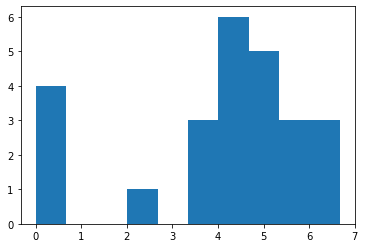

In [36]:
from matplotlib import pyplot as plt

plt.hist(percents, 10)

plt.show()